# Mamdani Fuzzy Inference System with Sepsis Data

   In this project we are building a Mamdani Fuzzy Inference System with the data of sepsis positive and negative patients. A Mamdani Fuzzy Inference System (FIS) is a type of fuzzy logic system that uses fuzzy if-then rules to make decisions based on input data. In a Mamdani FIS, the input variables are first fuzzified, which means that their crisp values are transformed into fuzzy set membership values. These membership values are then used to evaluate a set of if-then rules. The output of the system can be defuzzified, which means converting the fuzzy output back into a crisp value, or can be left out as they are.

   We have 2 folders as input: one containing the data of sepsis positive and other containing the data of sepsis negative patients. These folders contain csv files that has 25 row hourly data for each patient. I concatenated these files into a dataframe and took 1 row out of every 50 row in order to decrease the amount of rows. 

In [1]:
import pandas as pd
import glob
import os

path =  "/Users/berfin/Downloads/*"
csv_files = glob.glob(os.path.join(path+"sepsis", "*.csv"))

sepsis_data = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)
sepsis_data = sepsis_data[sepsis_data.index % 50 == 0]

In [2]:
sepsis_data 

,heart_rate,bp_systolic,bp_diastolic,map,resp,temp,spo2,fio2,wbc,bun,...,bicarbonate,hemoglobin,hematocrit,potassium,chloride,gcs,age,sirs,qsofa,sepsis_icd
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,100.0,98.0,54.0,70.000,16.0,38.111110,98.0,NaN,14.7,16.0,...,21.0,9.3,28.3,3.9,112.0,11.0,51.62,1.0,1.0,0.0
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.6,NaN,6.4,NaN,NaN,47.67,0.0,0.0,0.0
150,107.0,119.0,77.0,86.000,16.0,NaN,98.0,NaN,11.4,49.0,...,29.0,13.9,43.5,4.2,99.0,15.0,91.40,0.0,0.0,0.0
200,76.0,103.0,30.0,47.000,25.0,36.666667,96.0,NaN,6.5,23.0,...,20.0,10.2,30.5,4.1,112.0,15.0,86.43,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47750,105.0,190.0,92.0,124.667,27.0,36.444444,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.0,72.76,1.0,1.0,1.0
47800,81.0,145.0,65.0,98.000,22.0,36.111111,99.0,NaN,14.9,18.0,...,19.0,11.3,32.7,3.3,114.0,14.0,85.92,1.0,1.0,1.0
47850,51.0,119.0,51.0,74.000,24.0,36.888889,99.0,80.0,26.3,21.0,...,26.0,11.0,35.7,4.6,110.0,8.0,87.65,1.0,1.0,1.0
47900,101.0,85.0,41.0,58.000,21.0,38.666666,100.0,NaN,13.7,36.0,...,20.0,13.5,37.6,3.7,108.0,11.0,91.40,1.0,1.0,1.0


   Here are the correlations of each feature with others. I chose sepsis_icd as output and 5 features for input for my system. Firstly I picked out the ones having higher than %15 correlation with the output (which were heart_rate, bp_systolic, resp, bun, creatinine, ph, bicarbonate and po2) and I looked up for the features which were used in real life diagnosis (which were heart rate, creatinine, lactate, platelets, hemoglobin). Then I eliminated some by observing their correlations with each other, as the ones having high correlation make the same effect on the output. As final input features, I was left with heart_rate, creatinine, lactate, bicarbonate and hemoglobin.

In [3]:
sepsis_data.corr()

,heart_rate,bp_systolic,bp_diastolic,map,resp,temp,spo2,fio2,wbc,bun,...,bicarbonate,hemoglobin,hematocrit,potassium,chloride,gcs,age,sirs,qsofa,sepsis_icd
heart_rate,1.000000,-0.006667,0.178315,0.096211,0.266143,0.088738,-0.029819,0.129437,0.094158,-0.020878,...,-0.162993,0.033674,0.005923,-0.016776,0.010893,-0.034791,-0.209245,0.491197,0.148909,0.191040
bp_systolic,-0.006667,1.000000,0.557853,0.675282,0.090484,-0.008051,0.007946,-0.027606,-0.052163,-0.074546,...,0.177306,0.106935,0.089073,-0.103958,-0.075485,0.018137,0.019399,0.016175,-0.198902,-0.153078
bp_diastolic,0.178315,0.557853,1.000000,0.769342,0.044110,-0.021320,0.043382,0.080058,-0.095288,-0.139868,...,0.096642,0.191245,0.166526,-0.079889,-0.037880,0.033011,-0.201818,0.056831,-0.131982,-0.079671
map,0.096211,0.675282,0.769342,1.000000,0.035381,-0.021289,0.023198,0.000495,-0.071860,-0.113274,...,0.073404,0.168250,0.148467,-0.070636,-0.012968,-0.030386,-0.067514,0.008161,-0.137929,-0.102324
resp,0.266143,0.090484,0.044110,0.035381,1.000000,0.008966,-0.011675,0.098225,0.081481,0.098984,...,-0.139267,0.000494,0.017481,0.010565,0.020776,0.048208,0.038454,0.471671,0.364087,0.230817
temp,0.088738,-0.008051,-0.021320,-0.021289,0.008966,1.000000,-0.002277,0.071014,-0.013689,-0.051699,...,0.023162,0.066900,0.018094,-0.007549,0.004908,-0.019115,-0.062216,0.036889,0.034173,0.058044
spo2,-0.029819,0.007946,0.043382,0.023198,-0.011675,-0.002277,1.000000,0.154622,0.027722,-0.005004,...,0.048564,-0.047549,-0.097955,-0.057415,0.063431,0.026998,-0.026003,-0.030723,-0.022877,-0.033358
fio2,0.129437,-0.027606,0.080058,0.000495,0.098225,0.071014,0.154622,1.000000,0.002454,0.206133,...,-0.126012,0.008006,0.041582,0.245971,-0.073055,-0.051899,-0.012338,0.087622,0.104539,0.189386
wbc,0.094158,-0.052163,-0.095288,-0.071860,0.081481,-0.013689,0.027722,0.002454,1.000000,0.088807,...,-0.147769,0.086397,0.115228,0.033344,-0.034448,-0.064969,0.007181,0.296962,0.054189,0.142523
bun,-0.020878,-0.074546,-0.139868,-0.113274,0.098984,-0.051699,-0.005004,0.206133,0.088807,1.000000,...,-0.194355,-0.198525,-0.136872,0.252754,-0.113316,-0.061426,0.202122,0.067899,0.099419,0.230601


As it can be seen in this smaller correlation table, bun feature effects the sepsis output fairly. But it's also highly correlated with creatinine and including them both would be useless since they would mean the same thing. Therefore I had to pick the features I considered the most important out of the correlated ones. 

In [4]:
sepsis_data[["heart_rate", "bp_systolic", "resp", "bun", "creatinine", "lactate", "ph", "bicarbonate", "po2", "hemoglobin", "sepsis_icd"]].corr()

,heart_rate,bp_systolic,resp,bun,creatinine,lactate,ph,bicarbonate,po2,hemoglobin,sepsis_icd
heart_rate,1.000000,-0.006667,0.266143,-0.020878,-0.013738,0.138772,-0.045230,-0.162993,0.024656,0.033674,0.191040
bp_systolic,-0.006667,1.000000,0.090484,-0.074546,-0.057214,-0.130956,0.202353,0.177306,0.031642,0.106935,-0.153078
resp,0.266143,0.090484,1.000000,0.098984,0.057339,0.118442,-0.027048,-0.139267,-0.165675,0.000494,0.230817
bun,-0.020878,-0.074546,0.098984,1.000000,0.645354,0.088926,-0.124729,-0.194355,-0.091805,-0.198525,0.230601
creatinine,-0.013738,-0.057214,0.057339,0.645354,1.000000,0.111768,-0.190331,-0.217431,-0.072533,-0.165308,0.214422
lactate,0.138772,-0.130956,0.118442,0.088926,0.111768,1.000000,-0.203987,-0.297856,0.122077,0.017531,0.083044
ph,-0.045230,0.202353,-0.027048,-0.124729,-0.190331,-0.203987,1.000000,0.448860,0.137855,-0.031531,-0.241014
bicarbonate,-0.162993,0.177306,-0.139267,-0.194355,-0.217431,-0.297856,0.448860,1.000000,0.014767,0.056042,-0.252330
po2,0.024656,0.031642,-0.165675,-0.091805,-0.072533,0.122077,0.137855,0.014767,1.000000,0.027209,-0.176921
hemoglobin,0.033674,0.106935,0.000494,-0.198525,-0.165308,0.017531,-0.031531,0.056042,0.027209,1.000000,-0.132460


 Here are the final chosen inputs and their correlations.

In [5]:
sepsis_data[["heart_rate", "creatinine", "lactate", "bicarbonate", "hemoglobin", "sepsis_icd"]].corr()

,heart_rate,creatinine,lactate,bicarbonate,hemoglobin,sepsis_icd
heart_rate,1.000000,-0.013738,0.138772,-0.162993,0.033674,0.191040
creatinine,-0.013738,1.000000,0.111768,-0.217431,-0.165308,0.214422
lactate,0.138772,0.111768,1.000000,-0.297856,0.017531,0.083044
bicarbonate,-0.162993,-0.217431,-0.297856,1.000000,0.056042,-0.252330
hemoglobin,0.033674,-0.165308,0.017531,0.056042,1.000000,-0.132460
sepsis_icd,0.191040,0.214422,0.083044,-0.252330,-0.132460,1.000000


After choosing the inputs, I dropped the rows which had null values from the dataframe as they were less informative. I used the remaining 410 rows for my FIS (134 sepsis negative, 276 sepsis positive).

In [6]:
sepsis_data = sepsis_data[["heart_rate", "creatinine", "lactate", "bicarbonate", "hemoglobin", "sepsis_icd"]].dropna()
sepsis_data

,heart_rate,creatinine,lactate,bicarbonate,hemoglobin,sepsis_icd
200,76.0,1.2,1.6,20.0,10.2,0.0
500,111.0,0.9,3.6,25.0,11.8,0.0
550,135.0,0.6,1.6,23.0,10.8,0.0
800,96.0,0.8,2.3,22.0,11.1,0.0
850,84.0,0.9,2.0,27.0,12.5,0.0
...,...,...,...,...,...,...
47650,73.0,1.2,1.2,20.0,9.6,1.0
47800,81.0,0.8,0.9,19.0,11.3,1.0
47850,51.0,1.1,1.0,26.0,11.0,1.0
47900,101.0,1.4,2.1,20.0,13.5,1.0


In [7]:
neg_count = sepsis_data.loc[sepsis_data.sepsis_icd == 0, 'sepsis_icd'].count()
pos_count = sepsis_data.loc[sepsis_data.sepsis_icd == 1, 'sepsis_icd'].count()
print(f"{neg_count} of the rows are sepsis negative while {pos_count} are sepsis positive.")

134 of the rows are sepsis negative while 276 are sepsis positive.


 I implemented my Fuzzy Inference System using the simpful library. Simpful is a Python library for implementing simple fuzzy logic systems. It provides a set of functions and classes that allow you to define fuzzy variables, rules, and controllers, and to manipulate them using standard fuzzy logic operations such as union, intersection, and negation.

 Firstly I have initalized my Mamdani FIS with FuzzySystem() method. Then I defined fuzzy sets and linguistic variables for each of my inputs and output. To be able to define the linguistic variables and membership functions, I looked up which values indicated normal levels of each feature and which indicated low or high. I used trapezoidal membership functions from the library. I defined the universe of discourse boundaries by the min and max values occuring in the dataset, of the related feature.

In [8]:
from simpful import *

FS = FuzzySystem()

# Define fuzzy sets and linguistic variables
H1 = FuzzySet(function=Trapezoidal_MF(a=48, b=48, c=55, d=60), term="low")
H2 = FuzzySet(function=Trapezoidal_MF(a=55, b=60, c=100, d=110), term="normal")
H3 = FuzzySet(function=Trapezoidal_MF(a=100, b=110, c=163, d=163), term="high")
FS.add_linguistic_variable("HeartRate", LinguisticVariable([H1, H2, H3], universe_of_discourse=[48,163]))

C1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0.7, c=1.3, d=1.6), term="normal")
C2 = FuzzySet(function=Trapezoidal_MF(a=1.3, b=1.6, c=14, d=14), term="high")
FS.add_linguistic_variable("Creatinine", LinguisticVariable([C1, C2], universe_of_discourse=[0.2,14]))

L1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=3.5, d=5), term="low")
L2 = FuzzySet(function=Trapezoidal_MF(a=0, b=5, c=20, d=20), term="normal")
FS.add_linguistic_variable("Lactate", LinguisticVariable([L1, L2], universe_of_discourse=[0.3,20]))

B1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=18, d=22), term="low")
B2 = FuzzySet(function=Trapezoidal_MF(a=18, b=22, c=29, d=34), term="normal")
B3 = FuzzySet(function=Trapezoidal_MF(a=29, b=34, c=43, d=43), term="high")
FS.add_linguistic_variable("Bicarbonate", LinguisticVariable([B1, B2, B3], universe_of_discourse=[7,43]))

H1 = FuzzySet(function=Trapezoidal_MF(a=8, b=8, c=11, d=12), term="low")
H2 = FuzzySet(function=Trapezoidal_MF(a=11, b=12, c=15, d=16), term="normal")
H3 = FuzzySet(function=Trapezoidal_MF(a=15, b=16, c=18, d=18), term="high")
FS.add_linguistic_variable("Hemoglobin", LinguisticVariable([H1, H2, H3], universe_of_discourse=[5,18]))

# Define output fuzzy sets and linguistic variable
S1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=0.4, d=0.5), term="nonexistent")
S2 = FuzzySet(function=Trapezoidal_MF(a=0.5, b=0.6, c=1, d=1), term="existent")
FS.add_linguistic_variable("Sepsis", LinguisticVariable([S1, S2], universe_of_discourse=[0,1]))

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.9.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



Here are the visualizations of my membership functions for each input feature. 

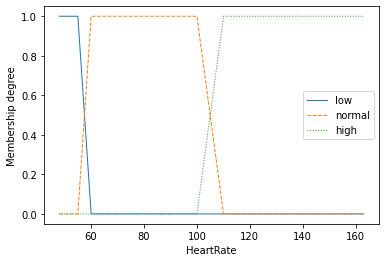

In [9]:
FS.plot_variable("HeartRate")

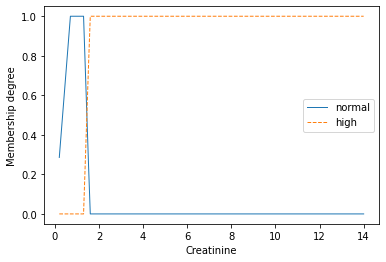

In [10]:
FS.plot_variable("Creatinine")

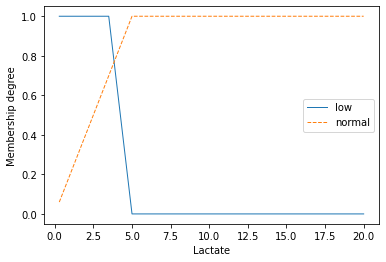

In [11]:
FS.plot_variable("Lactate")

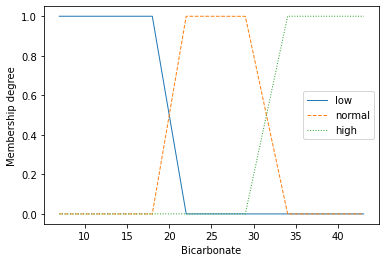

In [12]:
FS.plot_variable("Bicarbonate")

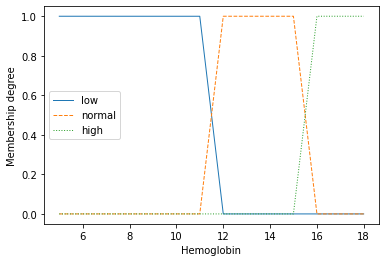

In [13]:
FS.plot_variable("Hemoglobin")

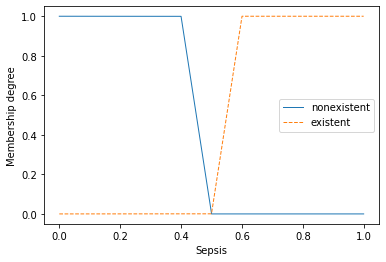

In [14]:
FS.plot_variable("Sepsis")

I created another dataframe, this time values having linguistic variables, by assigning the linguistic variable that had the highest membership value to that numeric value. I sorted this dataframe by all of its features, counted each distinct row. If the same input values occured in both sepsis positive and sepsis negative samples, I ignored the rows of the output with smaller count. And with the remaining data, I have defined my rules. If different linguistic variables of a feature didn't result in difference in the output, I didn't include that feature for that row instead of defining the same rule 2 or 3 times. These are the final rules: 

In [15]:
# Define fuzzy rules
R1 = "IF (HeartRate IS low) AND ((Creatinine IS normal) OR (Creatinine IS high)) AND (Lactate IS low) AND (Hemoglobin IS low) THEN (Sepsis IS existent)"  
R2 = "IF (HeartRate IS low) AND (Creatinine IS normal)  AND (Lactate IS normal) AND (Bicarbonate IS normal) AND (Hemoglobin IS low) THEN (Sepsis IS nonexistent)"
R3 = "IF (HeartRate IS low) AND (Creatinine IS high)  AND (Lactate IS normal) AND (Bicarbonate IS low) AND (Hemoglobin IS low) THEN (Sepsis IS nonexistent)"
R4 = "IF (HeartRate IS normal) AND (Creatinine IS normal)  AND (Lactate IS low) AND (Bicarbonate IS low) AND ((Hemoglobin IS low) OR (Hemoglobin IS normal)) THEN (Sepsis IS existent)"
R5 = "IF (HeartRate IS normal) AND (Creatinine IS normal)  AND (Lactate IS low) AND (Bicarbonate IS normal) AND (Hemoglobin IS low) THEN (Sepsis IS existent)"
R6 = "IF (HeartRate IS normal) AND (Creatinine IS normal)  AND (Lactate IS low) AND (Bicarbonate IS normal) AND ((Hemoglobin IS normal) OR (Hemoglobin IS high)) THEN (Sepsis IS nonexistent)"
R7 = "IF (HeartRate IS normal) AND (Creatinine IS normal)  AND (Lactate IS low) AND (Bicarbonate IS high) AND (Hemoglobin IS low) THEN (Sepsis IS existent)"
R8 = "IF (HeartRate IS normal) AND (Creatinine IS normal)  AND (Lactate IS low) AND (Bicarbonate IS high) AND (Hemoglobin IS normal) THEN (Sepsis IS nonexistent)"
R9 = "IF (HeartRate IS normal) AND (Creatinine IS normal)  AND (Lactate IS normal) AND (Bicarbonate IS low) AND ((Hemoglobin IS low) OR (Hemoglobin IS normal)) THEN (Sepsis IS existent)"
R10 = "IF (HeartRate IS normal) AND (Creatinine IS normal)  AND (Lactate IS normal) AND (Bicarbonate IS normal) AND ((Hemoglobin IS low) OR (Hemoglobin IS normal)) THEN (Sepsis IS nonexistent)"
R11 = "IF (HeartRate IS normal) AND (Creatinine IS high)  AND (Lactate IS low) AND ((Hemoglobin IS low) OR (Hemoglobin IS normal)) THEN (Sepsis IS existent)"
R12 = "IF (HeartRate IS normal) AND (Creatinine IS high)  AND (Lactate IS normal) AND ((Bicarbonate IS low) OR (Bicarbonate IS normal)) AND ((Hemoglobin IS low) OR (Hemoglobin IS normal)) THEN (Sepsis IS existent)"
R13 = "IF (HeartRate IS high) AND (Creatinine IS normal)  AND (Lactate IS low) AND ((Bicarbonate IS low) OR (Bicarbonate IS normal)) AND ((Hemoglobin IS low) OR (Hemoglobin IS normal)) THEN (Sepsis IS existent)"
R14 = "IF (HeartRate IS high) AND (Creatinine IS normal)  AND (Lactate IS low) AND ((Bicarbonate IS normal) OR (Bicarbonate IS high)) AND ((Hemoglobin IS low) OR (Hemoglobin IS normal)) THEN (Sepsis IS nonexistent)"
R15 = "IF (HeartRate IS high) AND (Creatinine IS normal)  AND (Lactate IS normal) AND ((Bicarbonate IS low) OR (Bicarbonate IS normal)) AND ((Hemoglobin IS low) OR (Hemoglobin IS normal)) THEN (Sepsis IS existent)"
R16 = "IF (HeartRate IS high) AND (Creatinine IS high)  AND ((Lactate IS low) OR (Lactate IS normal)) AND ((Bicarbonate IS low) OR (Bicarbonate IS normal)) AND ((Hemoglobin IS low) OR (Hemoglobin IS normal)) THEN (Sepsis IS existent)"
FS.add_rules([R1, R2, R3, R4, R5, R6, R7, R8, R9, R10, R11, R12, R13, R14, R15, R16])

For each row of the sepsis dataframe I calculated the final FIS predictions and added it to the dataframe as a new column. I also added their defuzzified versions, considering the predictions higher than or equal to 0.5 sepsis positive and predictions smaller than 0.5 sepsis negative.

In [16]:
prediction = []
defuzzified = []

for index, row in sepsis_data.iterrows():
    FS.set_variable("HeartRate", row.heart_rate)
    FS.set_variable("Creatinine", row.creatinine)
    FS.set_variable("Lactate", row.lactate)
    FS.set_variable("Bicarbonate", row.bicarbonate)
    FS.set_variable("Hemoglobin", row.hemoglobin)
    sepsis = FS.Mamdani_inference(["Sepsis"])
    prediction.append(round(sepsis["Sepsis"], 2))
    defuzzified.append(0 if prediction[-1] < 0.50 else 1)

sepsis_data['prediction'] = prediction
sepsis_data['defuzzified'] = defuzzified

In [17]:
sepsis_data

,heart_rate,creatinine,lactate,bicarbonate,hemoglobin,sepsis_icd,prediction,defuzzified
200,76.0,1.2,1.6,20.0,10.2,0.0,0.56,1
500,111.0,0.9,3.6,25.0,11.8,0.0,0.50,1
550,135.0,0.6,1.6,23.0,10.8,0.0,0.50,1
800,96.0,0.8,2.3,22.0,11.1,0.0,0.59,1
850,84.0,0.9,2.0,27.0,12.5,0.0,0.23,0
...,...,...,...,...,...,...,...,...
47650,73.0,1.2,1.2,20.0,9.6,1.0,0.59,1
47800,81.0,0.8,0.9,19.0,11.3,1.0,0.62,1
47850,51.0,1.1,1.0,26.0,11.0,1.0,0.68,1
47900,101.0,1.4,2.1,20.0,13.5,1.0,0.50,1


 Confusion matrix is a table that is used to evaluate the performance of a classification algorithm. It allows you to see how well your algorithm is predicting the true class labels for a given dataset.

 The rows of the confusion matrix represent the actual class labels, while the columns represent the predicted class labels. The cells of the matrix contain the number of observations that were predicted to belong to a certain class.
Here is my confusion matrix comparing the predictions with actual values. My system leaned on classifying samples sepsis positive since there were a lot of sepsis negative data I had to ignore because they had less amount of rows than sepsis positive data with same inputs. I have defined my rules with the remaining 304 rows and 297 rows are classified correctly. I also had a class imbalance as sepsis positive samples were the majority.

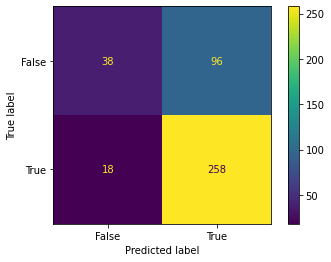

In [20]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(sepsis_data['sepsis_icd'], sepsis_data['defuzzified'])
matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
matrix_display.plot()

 By examining the values in the confusion matrix, we can compute various performance metrics such as accuracy, precision, recall and F1 score. These metrics can be useful for evaluating the effectiveness of a classification algorithm and for comparing different algorithms.


 Accuracy is defined as the fraction of correct predictions made by the model, expressed as a percentage. To calculate the accuracy of a classification model, we can use the following formula:  (TP + TN) / (TP + TN + FP + FN)

 Accuracy is a widely used metric, but it can be misleading if the classes in our dataset are imbalanced. In this case it may be better to use other metrics such as precision, recall, or F1 score.

The F1 score is another metric that is used to evaluate the performance of a classification algorithm. It is defined as the harmonic mean of precision and recall, where precision is the fraction of true positive predictions among all positive predictions made by the model, and recall is the fraction of true positive predictions among all actual positive observations in the dataset.

The F1 score is a balanced metric that takes into account both the precision and recall of a model. It can be calculated using the following formula: 2 * (Precision * Recall) / (Precision + Recall)

ROC AUC is a metric that is used to evaluate the performance of binary classification algorithms. It is defined as the area under the curve of the receiver operating characteristic (ROC) curve, which plots the true positive rate (TPR) against the false positive rate (FPR) at various classification thresholds. It ranges from 0 to 1, with higher values indicating better performance.

To calculate the ROC AUC score, we first need to compute the TPR and FPR at various classification thresholds, and then plot the points on a graph. The ROC curve is then created by connecting the points in a smooth curve. The area under the curve is then calculated by numerical integration. 

 I calculated each of these scores by using ready-to-use metrics methods of sklearn library. Here are the results I've obtained:

In [21]:
accuracy = round(metrics.accuracy_score(sepsis_data['sepsis_icd'], sepsis_data['defuzzified']), 2)
F1_score = round(metrics.f1_score(sepsis_data['sepsis_icd'], sepsis_data['defuzzified']), 2)
roc_auc = round(metrics.roc_auc_score(sepsis_data['sepsis_icd'], sepsis_data['defuzzified']), 2)
print(f"Accuracy: {accuracy*100}%\nF1_score: {F1_score*100}%\nROC AUC: {roc_auc*100}%")

Accuracy: 72.0%
F1_score: 82.0%
ROC AUC: 61.0%
